In [1]:
import pandas as pd 
from datetime import datetime 
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.callbacks import ModelCheckpoint


In [2]:
merged = pd.read_csv(r'C:\Users\jerin\Downloads\lbnlbldg59\lbnlbldg59\lbnlbldg59.processed\LBNLBLDG59\clean_Bldg59_2018to2020\clean data\long_merge.csv')

zone = "47"

if zone in ["36", "37", "38", "39", "40", "41", "42", "64", "65", "66", "67", "68", "69", "70"]:
    rtu = "rtu_001"
    wing = "hvac_N"
elif zone in ["18", "25", "26", "45", "48", "55", "56", "61"]:
    rtu = "rtu_003"
    wing = "hvac_S"
elif zone in ["16", "17", "21", "22", "23", "24", "46", "47", "51", "52", "53", "54"]:
    rtu = "rtu_004"
    wing = "hvac_S"
else:
    rtu = "rtu_002"
    wing = "hvac_N"
#merged is the dataframe
sorted = merged[["date"]+[col for col in merged.columns if zone in col or rtu in col or wing in col]+["hp_hws_temp", "aru_001_cwr_temp" , "aru_001_cws_fr_gpm" ,"aru_001_cws_temp","aru_001_hwr_temp" ,"aru_001_hws_fr_gpm" ,"aru_001_hws_temp"]]
sorted

date  zone_047_hw_valve  rtu_004_sat_sp_tn  \
0        2018-01-01 00:00:00              100.0               69.0   
1        2018-01-01 00:01:00              100.0               69.0   
2        2018-01-01 00:02:00              100.0               69.0   
3        2018-01-01 00:03:00              100.0               69.0   
4        2018-01-01 00:04:00              100.0               69.0   
...                      ...                ...                ...   
2072149  2020-12-31 23:58:00              100.0               68.0   
2072150  2020-12-31 23:58:00              100.0               68.0   
2072151  2020-12-31 23:59:00              100.0               68.0   
2072152  2020-12-31 23:59:00              100.0               68.0   
2072153  2021-01-01 00:00:00              100.0               68.0   

         zone_047_temp  zone_047_fan_spd  rtu_004_fltrd_sa_flow_tn  \
0                 67.5              20.0                  9265.604   
1                 67.5              20.0                  9265.604   
2                 67.5              20.0                  9708.240   
3                 67.5              20.0                  9611.638   
4                 67.5              20.0                  9215.110   
...                ...               ...                       ...   
2072149           63.2              20.0                 18884.834   
2072150           63.2              20.0                 18884.834   
2072151           63.2              20.0                 19345.508   
2072152           63.2              20.0                 19345.508   
2072153           63.2              20.0                 18650.232   

         rtu_004_sa_temp  rtu_004_pa_static_stpt_tn  rtu_004_oa_flow_tn  \
0                   66.1                       0.06            0.000000   
1                   66.0                       0.06         6572.099162   
2                   66.1                       0.06         7628.832542   
3                   66.1                       0.06         7710.294617   
4                   66.0                       0.06         7139.184090   
...                  ...                        ...                 ...   
2072149             64.4                       0.06         2938.320000   
2072150             64.4                       0.06         2938.320000   
2072151             64.3                       0.06         3154.390000   
2072152             64.3                       0.06         3154.390000   
2072153             64.1                       0.06         3076.270000   

         rtu_004_oadmpr_pct  ...  zone_047_heating_sp  Unnamed: 47_y  \
0                      28.0  ...                  NaN            NaN   
1                      28.0  ...                  NaN            NaN   
2                      28.0  ...                  NaN            NaN   
3                      28.0  ...                  NaN            NaN   
4                      28.0  ...                  NaN            NaN   
...                     ...  ...                  ...            ...   
2072149                23.4  ...                 71.0           69.0   
2072150                23.4  ...                 71.0           69.0   
2072151                23.4  ...                 71.0           69.0   
2072152                23.4  ...                 71.0           69.0   
2072153                22.9  ...                 71.0           69.0   

            hvac_S  hp_hws_temp  aru_001_cwr_temp  aru_001_cws_fr_gpm  \
0              NaN         75.3               NaN                 NaN   
1              NaN         75.3               NaN                 NaN   
2              NaN         75.3               NaN                 NaN   
3              NaN         75.3               NaN                 NaN   
4              NaN         75.3               NaN                 NaN   
...            ...          ...               ...                 ...   
2072149  23.145000        123.8             56.25               5

In [3]:
final_df = sorted.copy()
final_df['date'] = pd.to_datetime(final_df['date'], format = "%Y-%m-%d %H:%M:%S")
final_df = final_df[ (final_df.date.dt.date >date(2019, 4, 1)) & (final_df.date.dt.date< date(2020, 2, 15))]
final_df.isna().sum()

date                                          0
zone_047_hw_valve                             0
rtu_004_sat_sp_tn                             0
zone_047_temp                                 0
zone_047_fan_spd                              0
rtu_004_fltrd_sa_flow_tn                      0
rtu_004_sa_temp                               0
rtu_004_pa_static_stpt_tn                     0
rtu_004_oa_flow_tn                            0
rtu_004_oadmpr_pct                            0
rtu_004_econ_stpt_tn                          0
rtu_004_ra_temp                               0
rtu_004_oa_temp                               0
rtu_004_ma_temp                               0
rtu_004_sf_vfd_spd_fbk_tn                     0
rtu_004_rf_vfd_spd_fbk_tn                     0
rtu_004_fltrd_gnd_lvl_plenum_press_tn         0
rtu_004_fltrd_lvl2_plenum_press_tn            0
zone_047_cooling_sp                           0
Unnamed: 47_x                            394570
zone_047_heating_sp                     

In [4]:
testdataset_df = final_df[(final_df.date.dt.date <date(2019, 11, 8))]

traindataset_df = final_df[ (final_df.date.dt.date >date(2019, 11, 8))]

testdataset = testdataset_df[['rtu_004_oa_temp','rtu_004_ra_temp','hp_hws_temp','rtu_004_oa_flow_tn','rtu_004_oadmpr_pct',
                    'rtu_004_sat_sp_tn','rtu_004_rf_vfd_spd_fbk_tn','rtu_004_ma_temp','rtu_004_sa_temp','rtu_004_fltrd_sa_flow_tn',
                    'rtu_004_sf_vfd_spd_fbk_tn']].values


traindataset = traindataset_df[['rtu_004_oa_temp','rtu_004_ra_temp','hp_hws_temp','rtu_004_oa_flow_tn','rtu_004_oadmpr_pct',
                    'rtu_004_sat_sp_tn','rtu_004_rf_vfd_spd_fbk_tn','rtu_004_ma_temp','rtu_004_sa_temp','rtu_004_fltrd_sa_flow_tn',
                    'rtu_004_sf_vfd_spd_fbk_tn']].values

In [5]:
traindataset = traindataset.astype('float32')
testdataset = testdataset.astype('float32')


scaler = MinMaxScaler(feature_range=(0, 1))
traindataset = scaler.fit_transform(traindataset)
testdataset = scaler.transform(testdataset)

In [6]:
train,test = traindataset,testdataset

def create_dataset(dataset,time_step):
    x1,x2,x3,x4,x5,x6,x7,x8,x9,Y = [],[],[],[],[],[],[],[],[],[]
    for i in range(len(dataset)-time_step-1):
        x1.append(dataset[i:(i+time_step), 0])
        x2.append(dataset[i:(i+time_step), 1])
        x3.append(dataset[i:(i+time_step), 2])
        x4.append(dataset[i:(i+time_step), 3])
        x5.append(dataset[i:(i+time_step), 4])
        x6.append(dataset[i:(i+time_step), 5])
        x7.append(dataset[i:(i+time_step), 6])
        x8.append(dataset[i:(i+time_step), 7])
        # x9.append(dataset[i:(i+time_step), 8])
        Y.append([dataset[i + time_step, 7]])
    x1,x2,x3,x4,x5,x6,x7,x8 =  np.array(x1),np.array(x2),np.array(x3), np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(x8)#,np.array(x9)
    Y = np.reshape(Y,(len(Y),1))
    return np.stack([x1,x2,x3,x4,x5,x6,x7,x8],axis=2),Y




time_step = 30
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

checkpoint_path = "lstm2.keras"
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=1, callbacks=[checkpoint_callback])


Epoch 1/10


c:\Users\jerin\anaconda3\envs\smartbuilding\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2745/3220 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0100

KeyboardInterrupt: 

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64, verbose=1, callbacks=[checkpoint_callback])

Epoch 1/5
3218/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.8977e-04
Epoch 1: val_loss improved from inf to 0.01131, saving model to lstm2.keras
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 94s 29ms/step - loss: 1.8977e-04 - val_loss: 0.0113
Epoch 2/5
3219/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.7357e-04
Epoch 2: val_loss did not improve from 0.01131
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 91s 28ms/step - loss: 1.7358e-04 - val_loss: 0.0123
Epoch 3/5
3219/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.6701e-04
Epoch 3: val_loss did not improve from 0.01131
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 92s 28ms/step - loss: 1.6701e-04 - val_loss: 0.0127
Epoch 4/5
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.7043e-04
Epoch 4: val_loss did not improve from 0.01131
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 91s 28ms/step - loss: 1.7043e-04 - val_loss: 0.0131
Epoch 5/5
3218/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.6319e-04
Epoch 5: val_loss did not improve from 0.01131
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 104s 32m

In [ ]:
# train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9900/9900 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step


In [ ]:
%matplotlib qt
#'rtu_004_ma_temp','rtu_004_sa_temp'
var = 0
plt.plot(testdataset_df['date'][31:],y_test, label='Original Testing Data', color='blue')
plt.plot(testdataset_df['date'][31:],test_predict, label='Predicted Testing Data', color='red',alpha=0.8)
# anomalies = np.where(abs(test_predict[:,var] - y_test[:,var]) > 0.38)[0]
# plt.scatter(anomalies,test_predict[anomalies,var], color='black',marker ="o",s=100 )


plt.title('Testing Data - Predicted vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
# model.save("MA_temp_model.h5") 
# loaded_model = load_model("MA_temp_model.h5")

ENERGY DATA

In [267]:
zone =  ["18", "25", "26", "45", "48", "55", "56", "61","16", "17", "21", "23", "24", "46", "47", "51", "52", "53", "54"]
rtu = ["rtu_001","rtu_002","rtu_003","rtu_004"]
wing = ["hvac_N","hvac_S"]
env = ["air_temp_set_1","air_temp_set_2","dew_point_temperature_set_1d","relative_humidity_set_1","solar_radiation_set_1"]
wifi=["wifi_third_south","wifi_fourth_south"]
# any(sub in col for sub in zone) or
energy_data = merged[["date"]+[col for col in merged.columns if 
                               any(sub in col for sub in env) or any(sub in col for sub in wifi)]+wing]
df_filtered = energy_data[[col for col in energy_data.columns if 'Unnamed' not in col]]
df_filtered = df_filtered[[col for col in df_filtered.columns if 'co2' not in col]]
df_filtered = df_filtered[[col for col in df_filtered.columns if 'templogger' not in col]]
# df_filtered = df_filtered.dropna()
df_filtered.head(2)

date  air_temp_set_1  air_temp_set_2  \
0  2018-01-01 00:00:00           11.64           11.51   
1  2018-01-01 00:01:00           11.64           11.51   

   dew_point_temperature_set_1d  relative_humidity_set_1  \
0                           8.1                    79.07   
1                           8.1                    79.07   

   solar_radiation_set_1  wifi_third_south  wifi_fourth_south  hvac_N  hvac_S  
0                   86.7               NaN                NaN     NaN     NaN  
1                   86.7               NaN                NaN     NaN     NaN

In [268]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'], format = "%Y-%m-%d %H:%M:%S")
df_filtered = df_filtered[ (df_filtered.date.dt.date >date(2019, 4, 1)) & (df_filtered.date.dt.date< date(2020, 2, 15))]
# df_filtered.isna().sum()
if df_filtered.isna().any().any():
    print("There are NA values in the DataFrame columns.")

There are NA values in the DataFrame columns.


In [269]:
testdataset_df = df_filtered[(df_filtered.date.dt.date <date(2019, 8, 21))]

traindataset_df = df_filtered[ (df_filtered.date.dt.date >date(2019, 11, 8))]

testdataset = testdataset_df.drop(columns=["date"]).values

traindataset = traindataset_df.drop(columns=["date"]).values

columns_with_na = traindataset_df.columns[traindataset_df.isna().any()].tolist()
columns_with_na

[]

In [270]:
traindataset = traindataset.astype('float32')
testdataset = testdataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
traindataset = scaler.fit_transform(traindataset)
testdataset = scaler.transform(testdataset)

In [271]:
train,test = traindataset,testdataset

def create_dataset(dataset,time_step):
    x = [[] for _ in range(9)] 
    Y = []
    for i in range(len(dataset) - time_step - 1):
        for j in range(9):
            x[j].append(dataset[i:(i + time_step), j])
        Y.append([dataset[i + time_step, 7],dataset[i + time_step, 8]])
    x= [np.array(feature_list) for feature_list in x]
    Y = np.reshape(Y,(len(Y),2))
    return np.stack(x,axis=2),Y

time_step = 30
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=2))

model.compile(optimizer='adam', loss='mean_squared_error')

checkpoint_path = "lstm_energy_01.keras"
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64, verbose=1, callbacks=[checkpoint_callback])


In [ ]:
# checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=1, callbacks=[checkpoint_callback])

In [272]:
from tensorflow.keras.models import load_model
checkpoint_path = "lstm_energy_01.keras"
model = load_model(checkpoint_path)
test_predict1 = model.predict(X_test)
# train_predict1 = model.predict(X_train)

6345/6345 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step


In [273]:
%matplotlib qt
var = 1
plt.plot(testdataset_df['date'][31:],y_test[:,1], label='Original Testing Data', color='blue')
plt.plot(testdataset_df['date'][31:],test_predict1[:,1], label='Predicted Testing Data', color='red',alpha=0.8)
# anomalies = np.where(abs(test_predict[:,var] - y_test[:,var]) > 0.38)[0]
# plt.scatter(anomalies,test_predict[anomalies,var], color='black',marker ="o",s=100 )


plt.title('Testing Data - Predicted vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# from tensorflow.keras.models import load_model
# model.save("energy_model_01.h5") 

In [ ]:
%matplotlib qt
plt.plot(df_filtered['date'],df_filtered['hvac_S'])
plt.plot(df_filtered['date'],df_filtered['rtu_003_sf_vfd_spd_fbk_tn'])
plt.plot(df_filtered['date'],df_filtered['zone_025_temp'])

In [ ]:
plt.plot(merged['hvac_S'])
plt.plot(testdataset_df['hvac_S'])
plt.plot(traindataset_df['hvac_S'],'r')

In [ ]:
plt.plot(merged['hvac_N'])
plt.plot(testdataset_df['hvac_N'])
plt.plot(traindataset_df['hvac_N'],'r')

In [ ]:
# merged.columns.to_list()

2.16.1


LSTM 2.0

In [14]:
rtu = ["rtu_003","rtu_004","rtu_001","rtu_002"]
# wing = ["hvac_N","hvac_S"]
env = ["air_temp_set_1","air_temp_set_2","dew_point_temperature_set_1d","relative_humidity_set_1","solar_radiation_set_1"]
wifi=["wifi_third_south","wifi_fourth_south"]
# any(sub in col for sub in zone) or
energy_data = merged[["date","hp_hws_temp"]+[col for col in merged.columns if 
                               any(sub in col for sub in rtu) or any(sub in col for sub in wifi)]+env]
df_filtered = energy_data[[col for col in energy_data.columns if 'Unnamed' not in col]]
df_filtered = df_filtered[[col for col in df_filtered.columns if 'co2' not in col]]
df_filtered = df_filtered[[col for col in df_filtered.columns if 'templogger' not in col]]
# df_filtered = df_filtered.dropna()
df_filtered.head(2)

date  hp_hws_temp  rtu_001_sat_sp_tn  rtu_002_sat_sp_tn  \
0  2018-01-01 00:00:00         75.3               68.0               70.0   
1  2018-01-01 00:01:00         75.3               68.0               70.0   

   rtu_003_sat_sp_tn  rtu_004_sat_sp_tn  rtu_001_fltrd_sa_flow_tn  \
0               65.0               69.0                 14131.449   
1               65.0               69.0                 14164.429   

   rtu_002_fltrd_sa_flow_tn  rtu_003_fltrd_sa_flow_tn  \
0                 13998.757                 13558.539   
1                 14065.259                 13592.909   

   rtu_004_fltrd_sa_flow_tn  ...  rtu_002_fltrd_lvl2_plenum_press_tn  \
0                  9265.604  ...                                0.05   
1                  9265.604  ...                                0.05   

   rtu_003_fltrd_lvl2_plenum_press_tn  rtu_004_fltrd_lvl2_plenum_press_tn  \
0                                0.05                               0.050   
1                                0.04                               0.046   

   wifi_third_south  wifi_fourth_south  air_temp_set_1  air_temp_set_2  \
0               NaN                NaN           11.64           11.51   
1               NaN                NaN           11.64           11.51   

   dew_point_temperature_set_1d  relative_humidity_set_1  \
0                           8.1                    79.07   
1                           8.1                    79.07   

   solar_radiation_set_1  
0                   86.7  
1                   86.7  

[2 rows x 65 columns]

In [15]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'], format = "%Y-%m-%d %H:%M:%S")
df_filtered = df_filtered[ (df_filtered.date.dt.date >date(2018, 5, 1)) & (df_filtered.date.dt.date< date(2020, 5, 1))] #(2018, 5, 1)
# df_filtered.isna().sum()
if df_filtered.isna().any().any():
    print("There are NA values in the DataFrame columns.",df_filtered.isna().sum().tolist())

There are NA values in the DataFrame columns. [0, 0, 0, 0, 0, 0, 27872, 36554, 15482, 39222, 30748, 37389, 18791, 36175, 31546, 36586, 16271, 36346, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23177, 23177, 0, 0, 0, 0, 0]


In [15]:
plt.plot(df_filtered['rtu_002_rf_vfd_spd_fbk_tn'])

In [16]:
# df_filtered = df_filtered.loc[:,['date','hp_hws_temp',
#  'rtu_003_sa_temp',
#  'rtu_003_oadmpr_pct',
#  'rtu_003_ra_temp',
#  'rtu_003_oa_temp',
#  'rtu_003_ma_temp',
#  'rtu_003_sf_vfd_spd_fbk_tn',
#  'rtu_003_rf_vfd_spd_fbk_tn',
#  'air_temp_set_1',
#  'air_temp_set_2',
#  'dew_point_temperature_set_1d',
#  'relative_humidity_set_1',
#  'solar_radiation_set_1']]

df_filtered = df_filtered.loc[:,['date','hp_hws_temp',
 'rtu_003_sa_temp',
 'rtu_003_oadmpr_pct',
 'rtu_003_ra_temp',
 'rtu_003_oa_temp',
 'rtu_003_ma_temp',
 'rtu_003_sf_vfd_spd_fbk_tn',
 'rtu_003_rf_vfd_spd_fbk_tn',
 'rtu_004_sa_temp',
 'rtu_004_oadmpr_pct',
 'rtu_004_ra_temp',
 'rtu_004_oa_temp',
 'rtu_004_ma_temp',
 'rtu_004_sf_vfd_spd_fbk_tn',
 'rtu_004_rf_vfd_spd_fbk_tn',
#  'rtu_001_sa_temp',
#  'rtu_001_oadmpr_pct',
#  'rtu_001_ra_temp',
#  'rtu_001_oa_temp',
#  'rtu_001_ma_temp',
#  'rtu_001_sf_vfd_spd_fbk_tn',
#  'rtu_001_rf_vfd_spd_fbk_tn',
 
#  'rtu_002_sa_temp',
#  'rtu_002_oadmpr_pct',
#  'rtu_002_ra_temp',
#  'rtu_002_oa_temp',
#  'rtu_002_ma_temp',
#  'rtu_002_sf_vfd_spd_fbk_tn',
#  'rtu_002_rf_vfd_spd_fbk_tn',
 
 'rtu_003_sat_sp_tn',
 'rtu_004_sat_sp_tn',
#  'rtu_001_sat_sp_tn',
#  'rtu_002_sat_sp_tn',
 'air_temp_set_1',
 'air_temp_set_2',
 'dew_point_temperature_set_1d',
 'relative_humidity_set_1',
 'solar_radiation_set_1']]

In [8]:
df_filtered = df_filtered.dropna()
df_filtered.to_csv("sample_test_data.csv",index=False)

In [17]:
df_filtered = df_filtered.dropna()
# df_filtered.to_csv("sample_data.csv",index=False)

#----------------------------------------------------------------------------------
testdataset_df = df_filtered[(df_filtered.date.dt.date >date(2019, 7, 21))]

traindataset_df = df_filtered[(df_filtered.date.dt.date <date(2019, 7, 21))]

# testdataset_df = df_filtered[(df_filtered.date.dt.date >date(2020, 1, 1))]

# traindataset_df = df_filtered[(df_filtered.date.dt.date <date(2020, 1, 1))]


# testdataset_df.to_csv("sample_data_02.csv",index=False)
# .ewm(com = 1000,adjust=True).mean()
testdataset = testdataset_df.drop(columns=["date"]).rolling(window=30,min_periods=1).mean()

traindataset = traindataset_df.drop(columns=["date"]).rolling(window=30,min_periods=1).mean().values
# testdataset.to_csv("sample_data_smooth_01.csv",index=False)
columns_with_na_train = traindataset_df.columns[traindataset_df.isna().any()].tolist()
columns_with_na_test = testdataset_df.columns[testdataset_df.isna().any()].tolist()
print(columns_with_na_train)
print(columns_with_na_test)

[]
[]


In [18]:

traindataset = traindataset.astype('float32')
testdataset = testdataset.astype('float32')

scaler = StandardScaler()
traindataset = scaler.fit_transform(traindataset)
testdataset = scaler.transform(testdataset)

c:\Users\jerin\anaconda3\envs\smartbuilding\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [22]:
import joblib
joblib.dump(scaler, 'scaler_rtu_3_4.pkl')
# loaded_scaler = joblib.load('scaler.pkl')

['scaler_rtu_3_4.pkl']

In [19]:
#2 rtu model

train,test = traindataset,testdataset

def create_dataset(dataset,time_step):
    x = [[] for _ in range(22)] 
    Y = []
    for i in range(len(dataset) - time_step - 1):
        for j in range(22):
            x[j].append(dataset[i:(i + time_step), j])
        Y.append([dataset[i + time_step, 0],dataset[i + time_step, 1],dataset[i + time_step, 2],dataset[i + time_step, 3],
                  dataset[i + time_step, 4],dataset[i + time_step, 5],
                  dataset[i + time_step, 6],dataset[i + time_step, 7],
                  dataset[i + time_step, 8],dataset[i + time_step, 9],dataset[i + time_step, 10],
                  dataset[i + time_step, 11],dataset[i + time_step, 12],
                  dataset[i + time_step, 13],dataset[i + time_step, 14]])
    x= [np.array(feature_list) for feature_list in x]
    Y = np.reshape(Y,(len(Y),15))
    return np.stack(x,axis=2),Y

time_step = 30
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)


# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(LSTM(units=30))
# model.add(Dense(units=15))

# model.compile(optimizer='adam', loss='mean_squared_error')

# checkpoint_path = "lstm_2rtu_smooth_04.keras" #"lstm_2rtu_smooth_03.keras"--> 3,4rtu
# checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=64, verbose=1, callbacks=[checkpoint_callback])

In [340]:
train,test = traindataset,testdataset

def create_dataset(dataset,time_step):
    x = [[] for _ in range(34)] 
    Y = []
    for i in range(len(dataset) - time_step - 1):
        for j in range(34):
            x[j].append(dataset[i:(i + time_step), j])
        Y.append([dataset[i + time_step, 0],dataset[i + time_step, 1],dataset[i + time_step, 2],dataset[i + time_step, 3],
                  dataset[i + time_step, 4],dataset[i + time_step, 5],
                  dataset[i + time_step, 6],dataset[i + time_step, 7],
                  dataset[i + time_step, 8],dataset[i + time_step, 9],dataset[i + time_step, 10],
                  dataset[i + time_step, 11],dataset[i + time_step, 12],
                  dataset[i + time_step, 13],dataset[i + time_step, 14],
                  dataset[i + time_step, 15],dataset[i + time_step, 16],dataset[i + time_step, 17],
                  dataset[i + time_step, 18],dataset[i + time_step, 19],
                  dataset[i + time_step, 20],dataset[i + time_step, 21],
                  dataset[i + time_step, 22],dataset[i + time_step, 23],dataset[i + time_step, 24],
                  dataset[i + time_step, 24],dataset[i + time_step, 26],
                  dataset[i + time_step, 27],dataset[i + time_step, 28]])
    x= [np.array(feature_list) for feature_list in x]
    Y = np.reshape(Y,(len(Y),29))
    return np.stack(x,axis=2),Y

time_step = 30
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)


model = Sequential()
model.add(LSTM(units=80, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=60, return_sequences=True))
model.add(LSTM(units=60))
model.add(Dense(units=29))

model.compile(optimizer='adam', loss='mean_squared_error')

checkpoint_path = "lstm_4rtu_smooth_04.keras"
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64, verbose=1, callbacks=[checkpoint_callback])

c:\Users\jerin\anaconda3\envs\smartbuilding\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
7132/7133 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0395
Epoch 1: val_loss improved from inf to 0.06411, saving model to lstm_4rtu_smooth_04.keras
7133/7133 ━━━━━━━━━━━━━━━━━━━━ 247s 34ms/step - loss: 0.0395 - val_loss: 0.0641
Epoch 2/5
7131/7133 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0012
Epoch 2: val_loss improved from 0.06411 to 0.04068, saving model to lstm_4rtu_smooth_04.keras
7133/7133 ━━━━━━━━━━━━━━━━━━━━ 248s 35ms/step - loss: 0.0012 - val_loss: 0.0407
Epoch 3/5
7133/7133 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.2848e-04
Epoch 3: val_loss improved from 0.04068 to 0.03509, saving model to lstm_4rtu_smooth_04.keras
7133/7133 ━━━━━━━━━━━━━━━━━━━━ 245s 34ms/step - loss: 7.2848e-04 - val_loss: 0.0351
Epoch 4/5
7132/7133 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5.7519e-04
Epoch 4: val_loss did not improve from 0.03509
7133/7133 ━━━━━━━━━━━━━━━━━━━━ 245s 34ms/step - loss: 5.7520e-04 - val_loss: 0.0400
Epoch 5/5
7132/7133 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 5

In [19]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64, verbose=1, callbacks=[checkpoint_callback])

Epoch 1/5
8061/8061 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.9528e-04
Epoch 1: val_loss did not improve from 0.19006
8061/8061 ━━━━━━━━━━━━━━━━━━━━ 239s 30ms/step - loss: 8.9529e-04 - val_loss: 0.2020
Epoch 2/5
8060/8061 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.0121e-04
Epoch 2: val_loss improved from 0.19006 to 0.18934, saving model to lstm_4rtu_smooth_03.keras
8061/8061 ━━━━━━━━━━━━━━━━━━━━ 234s 29ms/step - loss: 8.0122e-04 - val_loss: 0.1893
Epoch 3/5
8061/8061 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.8454e-04
Epoch 3: val_loss did not improve from 0.18934
8061/8061 ━━━━━━━━━━━━━━━━━━━━ 231s 29ms/step - loss: 9.8453e-04 - val_loss: 0.2004
Epoch 4/5
8060/8061 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.8113e-04
Epoch 4: val_loss did not improve from 0.18934
8061/8061 ━━━━━━━━━━━━━━━━━━━━ 232s 29ms/step - loss: 7.8114e-04 - val_loss: 0.2031
Epoch 5/5
8059/8061 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.8365e-04
Epoch 5: val_loss did not improve from 0.18934
8061/8061 ━━━━━━━

In [20]:
from tensorflow.keras.models import load_model
checkpoint_path = "lstm_2rtu_smooth_03.keras"
model = load_model(checkpoint_path)

In [21]:
test_predict1 = model.predict(X_test)
train_predict1 = model.predict(X_train)

19190/19190 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step
16134/16134 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step


In [148]:
%matplotlib qt
var = 5
plt.plot(testdataset_df['date'][31:], y_test[:,var], label='Original Testing Data')
plt.plot(testdataset_df['date'][31:] ,test_predict1[:,var], label='Predicted Testing Data')

# anomalies = np.where(abs(test_predict1[:,var] - y_test[:,var]) > 0.38)
# plt.scatter(anomalies,test_predict1[anomalies,var], color='black',marker ="o",s=100 )


plt.title('Testing Data - Predicted vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [82]:
params = [
 'rtu_003_sa_temp',
 'rtu_003_oadmpr_pct',
 'rtu_003_ra_temp',
 'rtu_003_oa_temp',
 'rtu_003_ma_temp',
 'rtu_003_sf_vfd_spd_fbk_tn',
 'rtu_003_rf_vfd_spd_fbk_tn']

idx_2_params = {}
for i, param in enumerate(params):
    idx_2_params[i] = param

In [83]:
idx_2_params

{0: 'rtu_003_sa_temp',
 1: 'rtu_003_oadmpr_pct',
 2: 'rtu_003_ra_temp',
 3: 'rtu_003_oa_temp',
 4: 'rtu_003_ma_temp',
 5: 'rtu_003_sf_vfd_spd_fbk_tn',
 6: 'rtu_003_rf_vfd_spd_fbk_tn'}

KMEANS

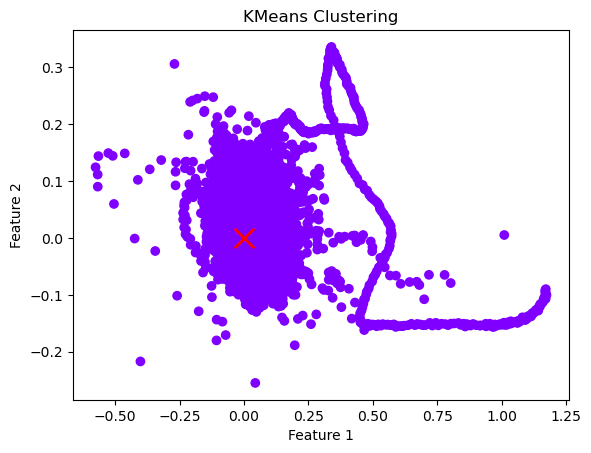

In [22]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(0)
X1 = train_predict1[:,1:8] - y_train[:,1:8]
X2 = train_predict1[:,8:15] - y_train[:,8:15]
# X3 = train_predict1[:,15:22] - y_train[:,15:22]
# X4 = train_predict1[:,22:29] - y_train[:,22:29]

k = 1

pca1 = PCA(n_components=2)
X1 = pca1.fit_transform(X1)
pca2 = PCA(n_components=2)
X2 = pca2.fit_transform(X2)

kmeans1 = KMeans(n_clusters=k, random_state=10) #2 for without smoothing
kmeans1.fit(X1)
kmeans2 = KMeans(n_clusters=k, random_state=10) #2 for without smoothing
kmeans2.fit(X2)
# kmeans3 = KMeans(n_clusters=k, random_state=10) #2 for without smoothing
# kmeans3.fit(X1)
# kmeans4 = KMeans(n_clusters=k, random_state=10) #2 for without smoothing
# kmeans4.fit(X2)








# # # Getting the cluster centers and labels
# centroids = pca.transform(kmeans1.cluster_centers_)
labels = kmeans1.labels_
# print(kmeans1.cluster_centers_)
# # Plotting the data points and cluster centers
plt.scatter(X1[:, 0], X1[:, 1],c=labels, cmap='rainbow')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], marker='x', c='red', s=200, linewidths=2)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [23]:
import joblib
joblib.dump(kmeans1, 'kmeans_rtu_3.pkl')
joblib.dump(kmeans2, 'kmeans_rtu_4.pkl')
joblib.dump(pca1, 'pca_rtu_3.pkl')
joblib.dump(pca2, 'pca_rtu_4.pkl')


['pca_rtu_4.pkl']

In [132]:
# [ params[i] for i in np.flip(np.argsort(abs(kmeans1.cluster_centers_[0])))]
distance1 = np.linalg.norm((pca1.transform(train_predict1[:,1:8]-y_train[:,1:8]))-kmeans1.cluster_centers_[0], ord=2, axis = 1)
plt.plot(y_train[:,7])
plt.plot(abs(distance1)>1,c='r')

In [140]:
XX1 = pca1.transform(test_predict1[:,1:8][300000:]-y_test[:,1:8][300000:])
distance1 = np.linalg.norm(XX1-kmeans1.cluster_centers_[0], ord=2, axis = 1)
plt.scatter(XX1[:, 0], XX1[:, 1],c=abs(distance1)>1, cmap='rainbow',s=2)
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], marker='x', c='green', s=20, linewidths=2)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [135]:
%matplotlib qt

distance1 = np.linalg.norm((pca1.transform(test_predict1[:,1:8]-y_test[:,1:8]))-kmeans1.cluster_centers_[0], ord=2, axis = 1)
distance2 = np.linalg.norm((pca2.transform(test_predict1[:,8:15]-y_test[:,8:15]))-kmeans2.cluster_centers_[0], ord=2, axis = 1)
# distance2 = np.linalg.norm((test_predict1[:,8:15]-y_test[:,8:15])-kmeans2.cluster_centers_[0], ord=2, axis = 1)
# distance3 = np.linalg.norm((test_predict1[:,15:22]-y_test[:,15:22])-kmeans3.cluster_centers_[0], ord=2, axis = 1)
# distance4 = np.linalg.norm((test_predict1[:,22:29]-y_test[:,22:29])-kmeans4.cluster_centers_[0], ord=2, axis = 1)
# distance_a = np.linalg.norm(test_predict1[:,8:]-a, ord=2, axis = 1)
# plt.plot(y_test[:,23],alpha=0.6)
# plt.plot(y_test[:,7],alpha=0.6)
# plt.plot(y_test[:,6],alpha=0.6)
plt.plot(testdataset_df['date'][31:] ,y_test[:,7],label='Return air fan speed')
# plt.plot(testdataset_df['date'][31:] ,y_test[:,9],alpha=0.6,label='Damper position')
# plt.plot(test_predict1[:,3],alpha=0.6)
plt.plot(testdataset_df['date'][31:] ,abs(distance1)>1,linewidth=2.5,label='Faults')
# plt.plot(testdataset_df['date'][31:] ,pd.Series((distance1)>3.5).rolling(window=60,min_periods=1).mean()==1,linewidth=2.5,label='Faults')
# plt.plot(abs(distance2)>3.5)
# plt.plot(abs(distance3)>5)
# plt.plot(abs(distance4)>5)
# plt.plot(distance_a>8,c='g')
plt.title('RTU-2 Faults')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [277]:
# fault = []
# for i in range(60,len(distance4)):
#     if np.mean((abs(distance4)>5)[i-60:i])>0.60 :
#         fault.append(1)
#     else:
#         fault.append(0)
plt.plot(fault,c='r')
plt.plot(abs(distance4)>5,c='b')


In [126]:
test[:,23]
arr = test[:, 23]
condition = (arr < 5) & (np.arange(len(arr)) < 35000) & (np.arange(len(arr)) > 30000)
arr[condition] = 2
plt.plot(test[:,23])


In [166]:
distance2 = np.linalg.norm((test_predict1[:,8:15]-y_test[:,8:15])-kmeans2.cluster_centers_[0], ord=2, axis = 1)
X = pca.transform((test_predict1[:,8:15]-y_test[:,8:15])-kmeans2.cluster_centers_[0])
centroids = pca.transform(kmeans2.cluster_centers_)

plt.scatter(X[:, 0], X[:, 1], c = abs(distance2)>10 ,cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=200, linewidths=2)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [155]:
k = 60
X= test_predict1 - y_test
processed_data = []
feat_df = pd.DataFrame(columns=["mean","std",])
for i in range(0,len(X), 40 ):
    mean = X[i:i+k].mean(axis = 0)
    std = X[i:i+k].std(axis = 0)
    max = X[i:i+k].max(axis = 0)
    min = X[i:i+k].min(axis = 0)
    iqr = np.percentile(X[i:i+k], 75, axis=0) - np.percentile(X[i:i+k], 25,axis=0)
    data = np.concatenate([mean, std, max, min, iqr])
    processed_data.append([data])
processed_data = np.concatenate(processed_data,axis=0) 

In [154]:
X = processed_data


k = 2

kmeans = KMeans(n_clusters=k,random_state=4)

kmeans.fit(X)

pca = PCA(n_components=2)
X = pca.fit_transform(X)

centroids = pca.transform(kmeans.cluster_centers_)
labels = kmeans.labels_

# Plotting the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=200, linewidths=2)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


NameError: name 'processed_data' is not defined

In [88]:
kmeans.cluster_centers_

array([[-1.76482953e-02, -4.84286715e-03],
       [ 2.35918490e+01,  6.47383719e+00]])

In [123]:
distance = np.linalg.norm(pca.transform(test_predict1)-kmeans.cluster_centers_[1], ord=2, axis = 1)
plt.plot(y_test[:,6])
plt.plot(distance>50,c='r')

ValueError: operands could not be broadcast together with shapes (481579,2) (15,) 

In [76]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

X = X1


gmm = GaussianMixture(n_components=3,random_state=10)
gmm.fit(X)
labels = gmm.predict(X)


plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [79]:
XX1 = pca.transform(test_predict1[:,1:8])-pca.transform(y_test[:,1:8])
labels = gmm.predict(XX1)

In [80]:
import seaborn as sns

b = np.linspace(0,len(y_test),len(y_test))
sns.scatterplot(x=b,y=y_test[:,6],palette='bright',hue=labels,size=0.5)

<Axes: >

In [56]:
traindataset_df

date  hp_hws_temp  rtu_001_sa_temp  rtu_001_oadmpr_pct  \
155849 2018-05-02 00:00:00         91.5             68.5                46.8   
155850 2018-05-02 00:01:00         91.4             68.7                46.8   
155851 2018-05-02 00:02:00         91.3             68.5                46.8   
155852 2018-05-02 00:03:00         91.2             68.6                46.8   
155853 2018-05-02 00:04:00         91.4             68.7                46.8   
...                    ...          ...              ...                 ...   
714240 2019-07-20 23:55:00        122.5             66.4               100.0   
714241 2019-07-20 23:56:00        123.0             65.6                98.2   
714242 2019-07-20 23:57:00        123.3             65.1                98.2   
714243 2019-07-20 23:58:00        123.2             65.4                98.2   
714244 2019-07-20 23:59:00        123.1             65.7                98.2   

        rtu_001_ra_temp  rtu_001_oa_temp  rtu_001_ma_temp  \
155849             73.4             63.2             64.8   
155850             73.4             63.4             64.9   
155851             73.3             63.1             64.7   
155852             73.4             63.4             64.7   
155853             73.4             63.1             65.0   
...                 ...              ...              ...   
714240             72.3             68.7             60.5   
714241             72.4             67.9             60.0   
714242             72.4             67.3             59.7   
714243             72.4             67.0             60.3   
714244             72.4             66.9             60.7   

        rtu_001_sf_vfd_spd_fbk_tn  rtu_001_rf_vfd_spd_fbk_tn  rtu_002_sa_temp  \
155849                       75.5                       63.0             68.2   
155850                       79.2                       61.7             69.5   
155851                       75.7                       58.1             67.9   
155852                       75.6                       63.6             66.9   
155853                       79.1                       67.6             67.9   
...                           ...                        ...              ...   
714240                       75.3                       65.7             63.9   
714241                       75.5                       56.7             64.6   
714242                       75.5                       57.6             64.9   
714243                       72.8                       52.8             65.4   
714244                       75.2                       56.5             65.5   

        ...  rtu_002_ma_temp  rtu_002_sf_vfd_spd_fbk_tn  \
155849  ...             69.2                       76.4   
155850  ...             68.9                       79.0   
155851  ...             64.6                       76.3   
155852  ...             65.3                       76.1   
155853  ...             68.4                       79.7   
...     ...              ...                        ...   
714240  ...             64.6                       75.6   
714241  ...             64.2                       76.0   
714242  ...             64.6                       76.3   
714243  ...             65.0                       74.3   
714244  ...             65.0                       75.4   

        rtu_002_rf_vfd_spd_fbk_tn  rtu_001_sat_sp_tn  rtu_002_sat_sp_tn  \
155849                       60.3               68.0               68.0   
155850                       59.1               68.0               68.0   
155851                       55.3               68.0               68.0   
155852                       57.0               68.0               68.0   
155853                       59.7               68.0               68.0   
...                           ...                ...                ...   
714240                       52.6               66.0               65.0   
714241                       56.9             